In [1]:
import torch 

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
! ln -s /content/drive/My\ Drive/ /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [17]:
%cd /mydrive/vehicle_yolov5

/content/drive/My Drive/vehicle_yolov5


In [5]:
%ls

dataset/  dataset.yaml  images/  vehicle-yolov5.ipynb  yolov5/


In [6]:
from IPython.display import Image

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14298, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 14298 (delta 62), reused 65 (delta 31), pack-reused 14194
Receiving objects: 100% (14298/14298), 13.33 MiB | 7.05 MiB/s, done.
Resolving deltas: 100% (9874/9874), done.


In [2]:
%cd yolov5

C:\Users\Amen Ben Mejed\Desktop\ml\vehicle_yolov5\yolov5


In [3]:
!pip install -r requirements.txt

In [15]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = 'dataset/images/train'
valPath = 'images/val'
crsPath = 'training_image' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  444
Validation images are :  111


In [13]:
trainimagePath = 'dataset/images/train'
trainlabelPath = 'dataset/labels/train'
valimagePath = 'dataset/images/val'
vallabelPath = 'dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg.split(".")[0] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg.split(".")[0]  +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
#shutil.move(crsPath, valPath) 


In [21]:
!python train.py --img 416 --batch 32 --epochs 100 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,

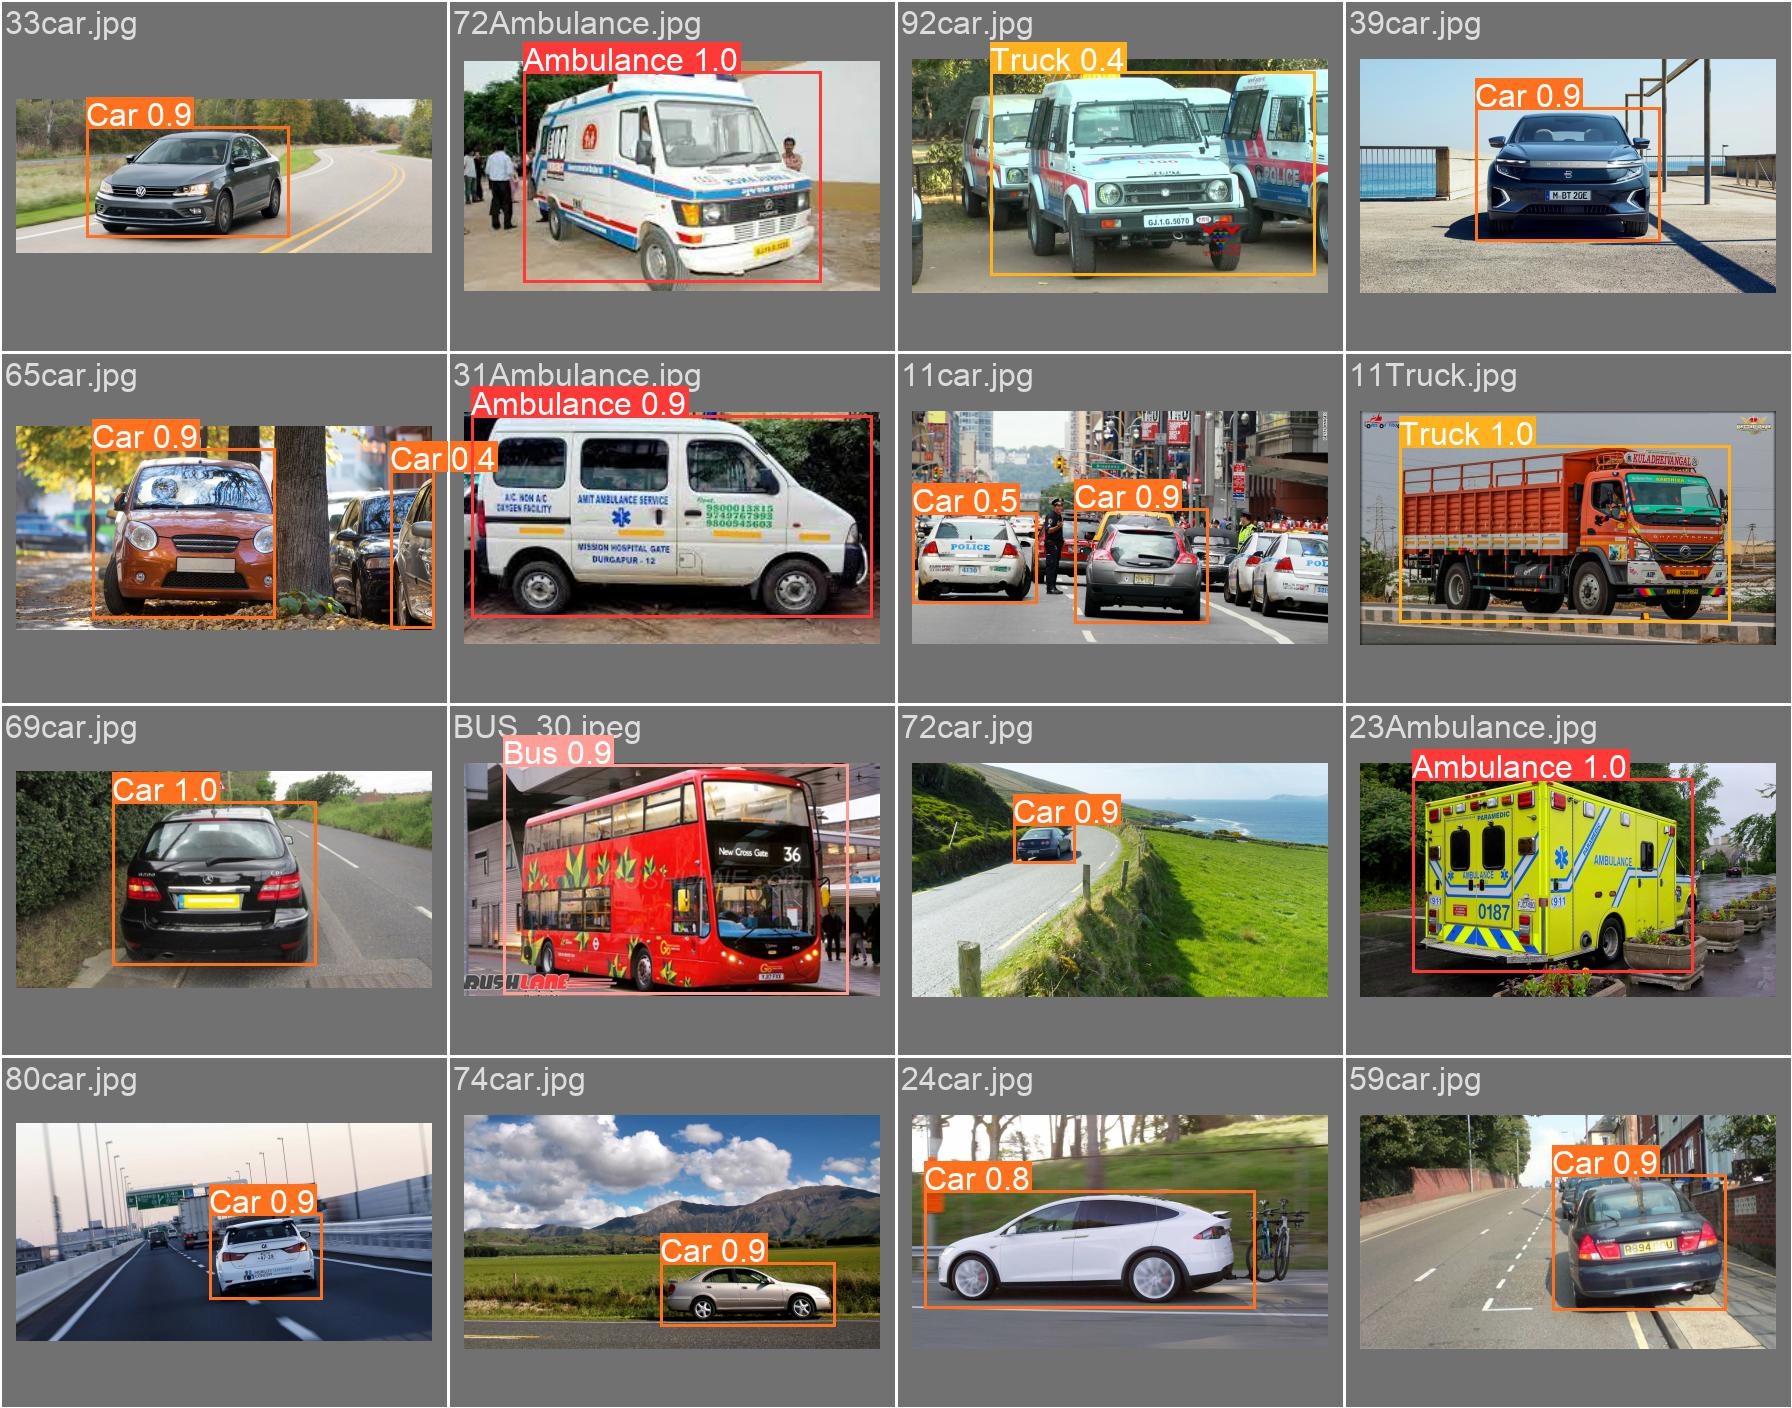

In [22]:
Image(filename='runs/train/exp2/val_batch0_pred.jpg',width=1000)

In [4]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 416 --conf 0.2 --source runs/train/exp2/test_images

detect: weights=['runs/train/exp2/weights/best.pt'], source=runs/train/exp2/test_images, data=data\dataset.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\Amen': No such file or directory
YOLOv5  2022-10-20 Python-3.9.12 torch-1.12.1 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 C:\Users\Amen Ben Mejed\Desktop\ml\vehicle_yolov5\yolov5\runs\train\exp2\test_images\ambulance-truck.jpg: 288x416 1 Ambulance, 43.0ms
image 2/8 C:\Users\Amen Ben Mejed\Desktop\ml\vehicle_yolov5\yolov5\runs\train\exp2\test_images\download (1).jpg: 224x416 (no detections), 38.0ms
image 3/8 C:\Users\A

In [38]:
# Convert weights to fp16 TFLite model

!python export.py --weights runs/train/exp2/weights/best.pt --data dataset.yaml --include tflite --img 416

export: data=dataset.yaml, weights=['runs/train/exp2/weights/best.pt'], imgsz=[416], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp2/weights/best.pt with output shape (1, 10647, 9) (13.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.9.2...

                 from  n    params  module                                  arguments                     
2022-10-20 18:38:49.827599: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0                -1  1      3520  models.comm

In [41]:
!python detect.py --weights runs/train/exp2/weights/best-fp16.tflite  --img 416 --conf 0.25 --source runs/train/exp2/test_images

detect: weights=['runs/train/exp2/weights/best-fp16.tflite'], source=runs/train/exp2/test_images, data=data/dataset.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Loading runs/train/exp2/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
image 1/8 /content/drive/MyDrive/vehicle_yolov5/yolov5/runs/train/exp2/test_images/ambulance-truck.jpg: 416x416 1 Ambulance, 1 Truck, 139.7ms
image 2/8 /content/drive/MyDrive/vehicle_yolov5/yolov5/runs/train/exp2/test_images/download (1).jpg: 416x416 (no detections), 106.2ms
imag